## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [34]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [35]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [36]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [37]:
#4 Check for missing  values if any, replace with appropriate values


In [38]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns="price")

In [53]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [39]:
y=df["price"]

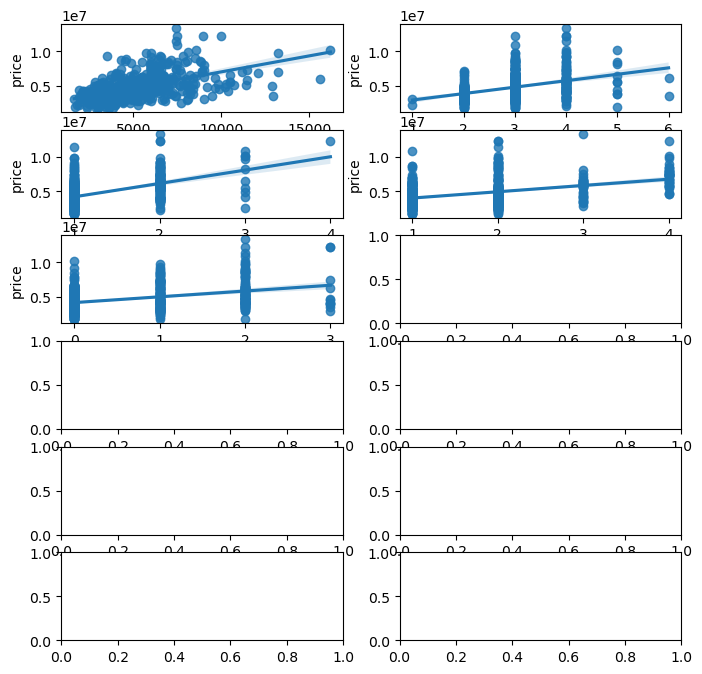

In [61]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(6,2,figsize=(8,8))
axes=axes.flatten()
cols=x.select_dtypes(include="number").columns
for i,col in enumerate(cols):
    cur=axes[i]
    sns.regplot(x=df[col],y=y,ax=cur)
plt.show()

In [65]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
cols=x.select_dtypes(exclude="number").columns
for col in cols:
    le=LabelEncoder()
    x[col]=le.fit_transform(x[col])
x  

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [42]:
#8  Avoiding the Dummy Variable Trap

In [80]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
cols=df.select_dtypes(include="number").columns.to_list()
cols.remove("price")
ss=StandardScaler()
x[cols]=ss.fit_transform(x[cols])
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


In [88]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [90]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [95]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(x_train)
y_pred

array([ 5332298.80162372,  3560000.36855075,  4404360.98837882,
        6422828.76367875,  6350894.77980773,  6125803.74005478,
        3154901.01336099,  4641274.27679259,  8811989.65931222,
        5151873.94105849,  7362142.90153427,  8117826.44806161,
        3323065.80214996,  6980537.59138658,  5358025.69101714,
        4519725.42144619,  3419875.40619323,  4377646.55495529,
        6385788.92284523,  5819537.06686141,  5258023.92404965,
        3835676.52871267,  6749594.55318049,  3217825.87201888,
        3232110.43832744,  3000311.50208294,  8531123.97262169,
        6055252.83880227,  6263181.51388486,  4355706.89446947,
        4899309.81837231,  7461955.39104298,  5328194.73506062,
        4087447.07413147,  2857431.11794584,  8414396.76104223,
        4547026.95451487,  5155699.58974984,  5750985.84469391,
        5445311.1708114 ,  2661054.75112932,  5668149.26438808,
        3256024.39161894,  4857095.26556867,  7102084.11357082,
        5724018.21510572,  6186517.53781

In [97]:
error=y_pred-y_train
error

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
           ...     
71    -1.913138e+05
106    2.095515e+05
270    1.985625e+06
435   -4.325689e+05
102    9.410638e+05
Name: price, Length: 381, dtype: float64

<Axes: ylabel='price'>

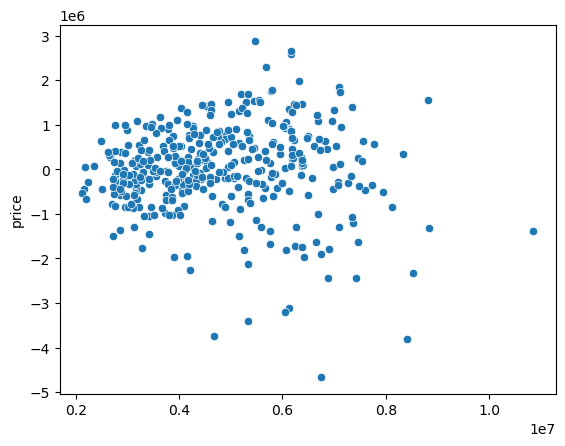

In [98]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
sns.scatterplot(x=y_pred,y=error)

In [99]:
#14  Predic on the test set
y_pe=model.predict(x_test)

<Axes: ylabel='price'>

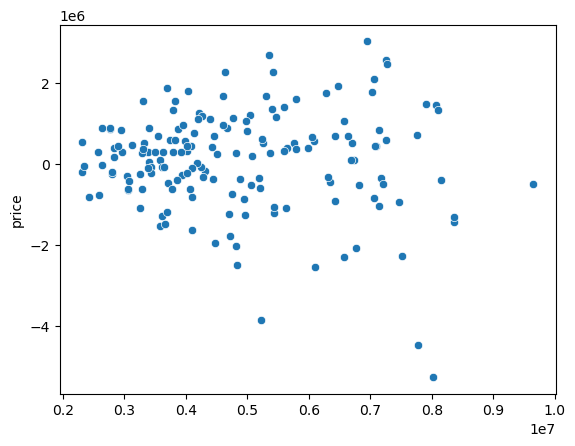

In [101]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
error=y_pe-y_test
sns.scatterplot(x=y_pe,y=error)

In [113]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_absolute_error,r2_score
m=mean_absolute_error(y_test,y_pe)
r2=r2_score(y_test,y_pe)
r2

0.6435419628959107

In [112]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def ad(n,p,r2):
    return 1-((1-r2)*(n-1))/(n-p-1)
cols=x.columns.to_list()
feats=[cols[:3],
     cols[:5],
     cols]
result=[]
for feat in feats:
    x_sub=x[feat]
    x_train,x_test,y_train,y_test=train_test_split(x_sub,y,train_size=0.7,random_state=42)
    ls=LinearRegression()
    model=ls.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    n=x_test.shape[0]
    p=x_test.shape[1]
    adj=ad(n,p,r2)
    result.append(adj)
print(result)

[0.4370063084816247, 0.5111445315836101, 0.615214171867771]
